## 7.1 层次分析法

层次分析法是美国运筹学家匹茨堡大学教授萨蒂于20世纪70年代初提出的一种评价策略。这种策略虽然带有*一定主观性*，但非常奏效，也是在社会科学研究中经常使用的一类方法。

层次分析法的流程分五步走：

1. **选择指标**，构建层次模型。
2. 对目标层到准则层之间和准则层到方案层之间构建**比较矩阵**。
3. 对每个比较矩阵计算CR值检验是否通过CR检验，**如果没有通过检验需要调整比较矩阵**。
4. 求出每个矩阵最大的特征值对应的归一化权重向量。
5. 根据不同矩阵的归一化权向量计算出不同方案的得分进行比较。

层次分析的想法简述：层次分析法是依托于比较的方案，一定要有多个方案，才能进行比较。比较不同的方案需要有相应的支点，所以选择指标很重要。类似买东西的适合要通过多个维度（价格，寿命等）考察一个商品的好坏。多个评价指标之间是相互关联的，甚至可以有**上下层级**的指标。

评级指标的权重确认一般采用 Delphi 法进行指标权重的确定。

AHP 的主要思想是：通过分析复杂系统的有关要素及相互关系，把问题简化为多层次的梯阶层次结构，自上而下分别为目标层、准则层和措施层。在该层次结构中,下层元素受上层元素控制，通过两两比较的方法建立判断矩阵，并通过一致性检验步骤检查判断矩阵的合理性，最终确定下层元素对于上层元素的权重。



### 构造判断矩阵

判断矩阵是，根据重要程度将层次结构模型中同一层次的要素相对于上层的某个因素，相互之间成对比较而形成的矩阵。假定 $A$ 层中元素 $A_k$ 与下一层 $n$ 个元素 $A_1,A_2,...,A_n$ 有关联，构造的判断矩阵如下

$$
\mathbf{B}=\begin{pmatrix}b_{11}&\ldots&b_{1n}\\\vdots&\ddots&\vdots\\b_{n1}&\cdots&b_{nn}\end{pmatrix}
$$

- $b_{ij}$ 表示对 $A_k$ 而言，$B_i$ 对 $B_j$ 相对重要性的数值表现。通常使用 1-9 表示法。

|标度| 含义|
|---------|----------|
| 1| 两元素同等重要|
| 3| 前一个元素比后一个元素稍微重要|
| 5| 前一个元素比后一个元素明显重要|
| 7| 前一个元素比后一个元素强烈重要|
| 9| 前一个元素比后一个元素绝对重要|
|2,4,6,8|上述两个标度的中值|

判断矩阵要有如下性质：

- $b_{ij}*b_{ji} = 1$
- $b_{ii}=1$



### 计算 CR 和 权重

首先需要计算**特征向量和特征值**

$CR$ 计算公式

$$
CR=\frac{CI}{RI}
$$

其中

$$
CI=\frac{\lambda_{max}-n}{n-1}
$$

| n      | 1    | 2    | 3    | 4    | 5    | 6    | 7    |
| ------ | ---- | ---- | ---- | ---- | ---- | ---- | ---- |
| **RI** | 0    | 0    | 0.52 | 0.89 | 1.12 | 1.26 | 1.32 |
| **n**  | 8    | 9    | 10   | 11   | 12   | 13   | 14   |
| **RI** | 1.41 | 1.46 | 1.49 | 1.52 | 1.54 | 1.56 | 1.58 |

权重归一化公式

$$
x_i=\frac{x_i}{\sum_{i-1}^n x_i}
$$

In [2]:
import numpy as np

def check_matrix(M:np.ndarray)->bool:
    """
    检查判断矩阵是否符合定义
    """
    bool_M:np.ndarray=M.T * M == np.ones_like(M)
    return bool_M.all()

def check_consistency(M: np.ndarray):
    """
    计算CR值

    Params:
    ---
    M: np.ndarray
        对比矩阵

    Returns:
    ---
    CR: float
        CR值，一般小于 0.1 通过检验
    W: np.ndarray
        权重向量
    """
    n = M.shape[1]  # 评价指标个数
    RI = [0, 0, 0.58, 0.90, 1.12, 1.24, 1.32, 1.41, 1.45, 1.49, 1.51]
    # 求判断矩阵的特征值和特征向量，V为特征值，D为特征向量
    V, D = np.linalg.eig(M)  # 注意这里的结果是复数，有虚部
    # 求矩阵的最大特征值
    # eig 方法已经排好了，所以直接取第一个即可
    v, d = V[0], D[0]
    W = d / np.sum(d)  # 归一化后的权重向量
    CI = (v - n) / (n - 1)
    CR = CI / RI[n]
    return CR, W

### 7.1.2 层次分析法的案例

上面的纯文字表述可能还是会有些抽象，没关系，我们这里有两个不错的案例。

**例7.1** 某日从三条河流的基站处抽检水样，得到了水质的四项检测指标如表5.1所示。请根据提供数据对三条河流的水质进行评价。其中，DO代表水中溶解氧含量，越大越好；CODMn表示水中高锰酸盐指数，NH3-N表示氨氮含量，这两项指标越小越好；pH值没有量纲，在6~9区间内较为合适。

**例7.1的数据**

| **地点名称**   | **pH\*** | **DO** | **CODMn** | **NH3-N** |
| -------------- | -------- | ------ | --------- | --------- |
| 四川攀枝花龙洞 | 7.94     | 9.47   | 1.63      | 0.077     |
| 重庆朱沱       | 8.15     | 9.00   | 1.4       | 0.417     |
| 湖北宜昌南津关 | 8.06     | 8.45   | 2.83      | 0.203     |


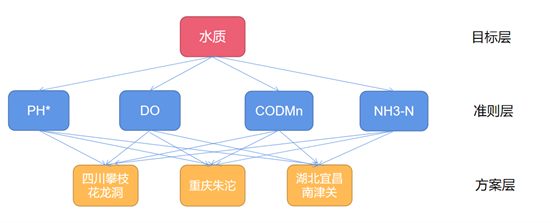

首先，我们需要对上面的数据分析：该评价问题一共有三个样本，四个评价指标。不同的评价指标还不太一样，有的越大越好有的越小越好

接下来的操作就是对目标层到准则层构建一个大小为4的方阵，准则层到方案层构建4个大小为3的方阵。我们先来计算一下这个目标层到准则层，至于准则层到方案层的矩阵都是如法炮制的过程。例如，创建了这么一个矩阵：

| **变量**  | **pH\*** | **DO** | **CODMn** | **NH3-N** |
| --------- | -------- | ------ | --------- | --------- |
| **pH\***  | 1        | 1/5    | 1/3       | 1         |
| **DO**    | 5        | 1      | 3         | 5         |
| **CODMn** | 3        | 1/3    | 1         | 3         |
| **NH3-N** | 1        | 1/5    | 1/3       | 1         |


In [3]:
# 构建矩阵
A = np.array(
    [
        [1, 1 / 5, 1 / 3, 1],
        [5, 1, 3, 5],
        [3, 1 / 3, 1, 3],
        [1, 1 / 5, 1 / 3, 1],
    ]
)

if check_matrix(A):
    print("对比矩阵A通过矩阵检查")
else:
    raise ValueError("对比矩阵A未通过矩阵检查")

CR, W = check_consistency(A)
if CR<0.10:
    print("CR=",CR)
    print("对比矩阵A通过一致性检验，各向量权重向量Q为：")
    print(W)
else:
    print("对比矩阵A未通过一致性检验，需对对比矩阵A重新构造")

对比矩阵A通过矩阵检查
CR= (0.012944482621398318+0j)
对比矩阵A通过一致性检验，各向量权重向量Q为：
[-0.22963642+0.j          0.08125132+0.10775945j  0.08125132-0.10775945j
  1.06713377+0.j        ]


很多同学可能会问一个问题，说：这里分解出来的权重向量为什么是个复数。注意，python 进行矩阵分解的时候是在复数域内进行分解，所得到的向量也是复数向量。虚部为0的情况下想要单独分析实部，通过 `Q.real` 即可达成取实部的效果。

计算出目标层到准则层的1个权重向量和4个准则层到方案层的权重向量以后，可以列出 表5.5 将权重向量进行排布。

 **例7.1中4个权重向量的排布**

| **地点名称**   | **pH\*** | **DO** | **CODMn** | **NH3-N** | **得分** |
| -------------- | -------- | ------ | --------- | --------- | -------- |
|                | 0.0955   | 0.5596 | 0.2495    | 0.0955    |          |
| 四川攀枝花龙洞 | 0.4166   | 0.5396 | 0.2970    | 0.6370    | 0.4767   |
| 重庆朱沱       | 0.3275   | 0.2970 | 0.5396    | 0.1047    | 0.3421   |
| 湖北宜昌南津关 | 0.2599   | 0.1634 | 0.1634    | 0.2583    | 0.1817   |

将准则层到方案层得到的7个成对比较矩阵对应的权重向量排列为一个矩阵，矩阵的每一行表示对应的方案，矩阵的每一列代表评价准则。将这一方案权重矩阵与目标层到准则层的权重向量进行数量积，得到的分数就是最终的评分。

最终得到的一个结论是：在评价过程中水中溶解氧含量与钴金属含量占评价体系比重最大，而四川攀枝花龙洞的水质虽然含钴元素比另外两个更高，但由于溶解氧更多，NH3-N的含量更小，水体不显富营养化。就整体而言，四川攀枝花龙洞得分高于重庆朱沱和湖北宜昌南津关。


## 熵权分析法